<a href="https://colab.research.google.com/github/thaianh1210/LogisticRegression/blob/main/Pytorch_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
!gdown --id 1BOgseHn1k2WH10A1f2L__GtyhMsMXCfl

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1BOgseHn1k2WH10A1f2L__GtyhMsMXCfl
To: /content/iris_full.csv
100% 2.06k/2.06k [00:00<00:00, 5.07MB/s]


In [ ]:
# Data Preparation
data = np.genfromtxt('iris_full.csv',
                     delimiter=',',
                     skip_header=1)
inputs  = torch.tensor(data[:,0:4], dtype = torch.float)
targets = torch.tensor(data[:,4], dtype = torch.float)

print(inputs[:10])
print(targets[:10])

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000]])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [ ]:
inputs.shape

torch.Size([100, 4])

In [ ]:
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[5.1000, 3.5000, 1.4000, 0.2000],
         [4.9000, 3.0000, 1.4000, 0.2000],
         [4.7000, 3.2000, 1.3000, 0.2000]]), tensor([0., 0., 0.]))

In [ ]:
batch_size = 20
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))

[tensor([[4.4000, 2.9000, 1.4000, 0.2000],
         [5.0000, 3.5000, 1.3000, 0.3000],
         [5.0000, 3.3000, 1.4000, 0.2000],
         [5.6000, 2.9000, 3.6000, 1.3000],
         [6.2000, 2.2000, 4.5000, 1.5000],
         [6.5000, 2.8000, 4.6000, 1.5000],
         [5.4000, 3.0000, 4.5000, 1.5000],
         [6.7000, 3.1000, 4.4000, 1.4000],
         [4.3000, 3.0000, 1.1000, 0.1000],
         [4.8000, 3.0000, 1.4000, 0.3000],
         [4.8000, 3.1000, 1.6000, 0.2000],
         [5.0000, 3.2000, 1.2000, 0.2000],
         [4.4000, 3.0000, 1.3000, 0.2000],
         [4.9000, 3.1000, 1.5000, 0.1000],
         [6.0000, 2.2000, 4.0000, 1.0000],
         [4.8000, 3.4000, 1.9000, 0.2000],
         [6.6000, 2.9000, 4.6000, 1.3000],
         [5.7000, 2.9000, 4.2000, 1.3000],
         [6.6000, 3.0000, 4.4000, 1.4000],
         [5.1000, 3.8000, 1.6000, 0.2000]]),
 tensor([0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
         1., 0.])]

In [ ]:
class my_network(nn.Module):
  def __init__(self):
    super(my_network, self).__init__()
    self.linear1 = nn.Linear(4,1)
    #self.act1 = nn.Sigmoid()
  def forward(self, x):
    # x = self.liner1(x)
    # x = self.act1(x)
    x = torch.sigmoid(self.linear1(x))
    return x

In [ ]:
model = my_network()

In [ ]:
opt = torch.optim.SGD(model.parameters(), 0.001)

In [ ]:
loss_fn = torch.nn.BCELoss()

In [ ]:
targets = targets.reshape(100,1)
targets.shape

torch.Size([100, 1])

In [ ]:
# Define a utility function to train the model
def fit(train_dl, num_epochs, model, loss_fn, opt):
    losses = []
    for epoch in range(num_epochs):
        for xb,yb in train_dl:
            # Generate predictions
            pred = model(xb)
            #print(pred, yb)
            loss = loss_fn(pred.reshape(-1,), yb)
            #print(loss)
            losses.append(loss.item())
            # Perform gradient descent
            loss.backward()
            opt.step()
            opt.zero_grad()
    print('Training loss: ', loss_fn(model(inputs), targets))
    return losses


In [ ]:
losses = fit(train_dl, 20000, model, loss_fn, opt)

Training loss:  tensor(0.0079, grad_fn=<BinaryCrossEntropyBackward0>)


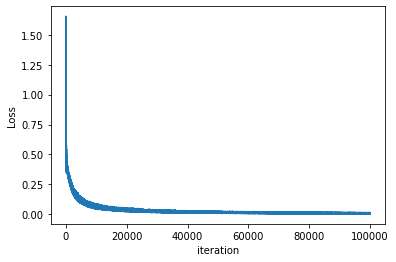

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
model.parameters

<bound method Module.parameters of my_network(
  (linear1): Linear(in_features=4, out_features=1, bias=True)
)>

In [ ]:
test = torch.rand(4)
test

tensor([0.0172, 0.9339, 0.3274, 0.4628])

In [ ]:
model(test)

tensor([0.4165], grad_fn=<SigmoidBackward0>)

In [ ]:
model(torch.tensor([5.1, 2.5, 3. , 1.1]))

tensor([0.9255], grad_fn=<SigmoidBackward0>)